In [ ]:
### ML Model Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load virulent features
virulent_df = pd.read_csv("/content/drive/MyDrive/VFDB_Downloads/VFDB_PDBs/structure_features_extracted_clean_final.csv")
virulent_df['Label'] = 1  # 1 = Virulent

# Load non-virulent features
nonvirulent_df = pd.read_csv("/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean.csv")
nonvirulent_df['Label'] = 0  # 0 = Non-virulent

# Cleaning data ( dropping NA )
nonvirulent_df = nonvirulent_df.dropna(subset=[
    "alpha_helix_content",
    "beta_sheet_content",
    "coil_content",
    "hbond_density"
])

# Combining the tow
combined_df = pd.concat([virulent_df, nonvirulent_df], ignore_index=True)

# Shuffle rows 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save combined dataset
output_path = "/content/drive/MyDrive/Combined_AlphaFold_Features.csv"
combined_df.to_csv(output_path, index=False)

print(f"Combined dataset saved at: {output_path}")
print(f"Final dataset shape: {combined_df.shape}")


✅ Combined dataset saved at: /content/drive/MyDrive/Combined_AlphaFold_Features.csv
🧩 Final dataset shape: (23976, 7)


In [4]:
# Dropping non-numeric columns and using label as y
X = combined_df.drop(["UniProt_ID", "Label"], axis=1)
y = combined_df["Label"]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 3. Split into train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split: {X_train.shape[0]} train samples, {X_test.shape[0]} test samples.")


✅ Data split: 19180 train samples, 4796 test samples.

🎯 Test Accuracy: 0.8703

🧩 Confusion Matrix:
[[1318  383]
 [ 239 2856]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1701
           1       0.88      0.92      0.90      3095

    accuracy                           0.87      4796
   macro avg       0.86      0.85      0.86      4796
weighted avg       0.87      0.87      0.87      4796



In [6]:
## Initial Model Training and Evaluation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300, random_state=42)
}

# Train and evaluate each
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))
    results[name] = acc

# Summary
print("\n📈 Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


✅ Train size: (19180, 5), Test size: (4796, 5)

🎯 Random Forest Accuracy: 0.8703
              precision    recall  f1-score   support

           0     0.8465    0.7748    0.8091      1701
           1     0.8818    0.9228    0.9018      3095

    accuracy                         0.8703      4796
   macro avg     0.8641    0.8488    0.8554      4796
weighted avg     0.8693    0.8703    0.8689      4796


🎯 Logistic Regression Accuracy: 0.7606
              precision    recall  f1-score   support

           0     0.7193    0.5332    0.6124      1701
           1     0.7754    0.8856    0.8268      3095

    accuracy                         0.7606      4796
   macro avg     0.7473    0.7094    0.7196      4796
weighted avg     0.7555    0.7606    0.7508      4796



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:27:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🎯 XGBoost Accuracy: 0.8532
              precision    recall  f1-score   support

           0     0.8243    0.7449    0.7826      1701
           1     0.8668    0.9128    0.8892      3095

    accuracy                         0.8532      4796
   macro avg     0.8456    0.8288    0.8359      4796
weighted avg     0.8518    0.8532    0.8514      4796


🎯 MLP Neural Net Accuracy: 0.7354
              precision    recall  f1-score   support

           0     0.7443    0.3868    0.5091      1701
           1     0.7334    0.9270    0.8189      3095

    accuracy                         0.7354      4796
   macro avg     0.7389    0.6569    0.6640      4796
weighted avg     0.7373    0.7354    0.7090      4796


📈 Model Comparison:
Random Forest: 0.8703
Logistic Regression: 0.7606
XGBoost: 0.8532
MLP Neural Net: 0.7354


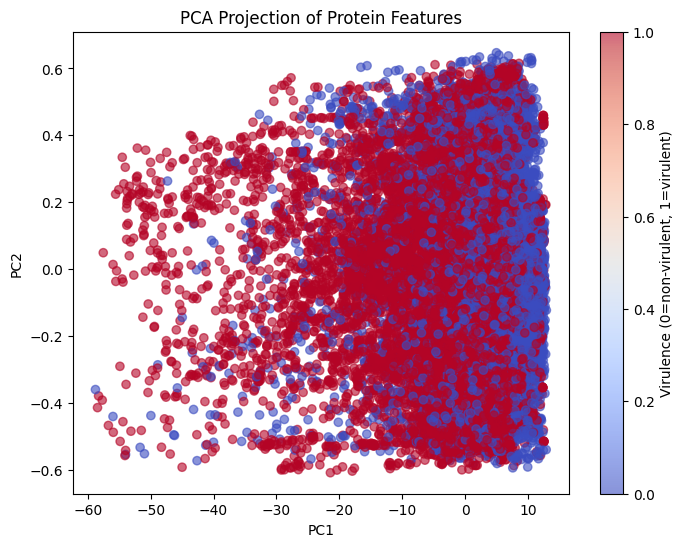

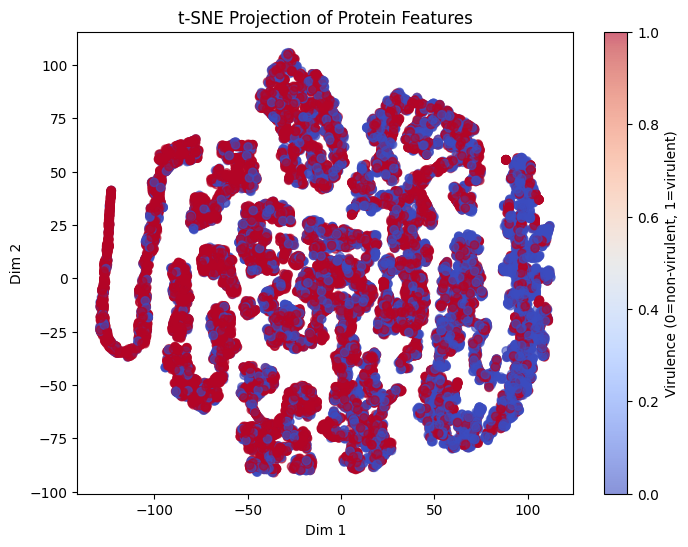

In [7]:
### Ignore this section

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


X = combined_df.drop(["UniProt_ID", "Label"], axis=1)
y = combined_df["Label"]

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.6)
plt.title("PCA Projection of Protein Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Virulence (0=non-virulent, 1=virulent)")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="coolwarm", alpha=0.6)
plt.title("t-SNE Projection of Protein Features")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(label="Virulence (0=non-virulent, 1=virulent)")
plt.show()


In [8]:
# Grid Search for Random Forest Hyperparameters
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Best RF Parameters: {grid_rf.best_params_}")
print(f"Best RF Accuracy: {grid_rf.best_score_:.4f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best RF Accuracy: 0.8640


In [13]:
import pandas as pd

# Load 
nonvirulent = pd.read_csv("/content/drive/MyDrive/NonVirulent_AlphaFold_PDBs/structure_features_extracted_clean.csv")
virulent = pd.read_csv("/content/drive/MyDrive/VFDB_Downloads/VFDB_PDBs/structure_features_extracted_clean.csv")

# Add labels
nonvirulent["Label"] = 0  # Non-virulent
virulent["Label"] = 1     # Virulent

# Combine
combined_df = pd.concat([nonvirulent, virulent], ignore_index=True)
combined_df = combined_df.dropna()

# Save
combined_df.to_csv("/content/drive/MyDrive/ML_combined_protein_features.csv", index=False)

print("Combined dataset saved at /content/drive/MyDrive/ML_combined_protein_features.csv")
print(f"Shape: {combined_df.shape}")
print(combined_df.head())


✅ Combined dataset saved at /content/drive/MyDrive/ML_combined_protein_features.csv
Shape: (23976, 7)
   UniProt_ID  mean_pLDDT  alpha_helix_content  beta_sheet_content  \
1  A0A0A7HF73   93.826494             0.379167            0.341667   
2  A0A0A7HF79   93.815284             0.290698            0.299419   
3  A0A0A7HFE1   89.906073             0.536716            0.140187   
4  A0A0A7HFE6   93.229352             0.586667            0.096000   
5  A0A0A7HGA1   95.018259             0.264085            0.292254   

   coil_content  hbond_density  Label  
1      0.279167       0.301776      0  
2      0.409884       0.330532      0  
3      0.323097       0.249902      0  
4      0.317333       0.312187      0  
5      0.443662       0.315929      0  


Train size: (16783, 5), Validation size: (3596, 5), Test size: (3597, 5)
🔍 Tuning rf...
✅ Best rf params: {'n_estimators': 200}
🔍 Tuning xgb...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:36:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best xgb params: {'n_estimators': 200}
🔍 Tuning cat...
✅ Best cat params: {'iterations': 200}
🔍 Tuning lgbm...
[LightGBM] [Info] Number of positive: 10830, number of negative: 5953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 16783, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.645296 -> initscore=0.598425
[LightGBM] [Info] Start training from score 0.598425
✅ Best lgbm params: {'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:37:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 10830, number of negative: 5953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 16783, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.645296 -> initscore=0.598425
[LightGBM] [Info] Start training from score 0.598425

🎯 Validation Accuracy: 0.8704
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1276
           1       0.88      0.93      0.90      2320

    accuracy                           0.87      3596
   macro avg       0.87      0.85      0.85      3596
weighted avg       0.87      0.87      0.87      3596


🎯 Test Accuracy: 0.8604
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1276
           1      

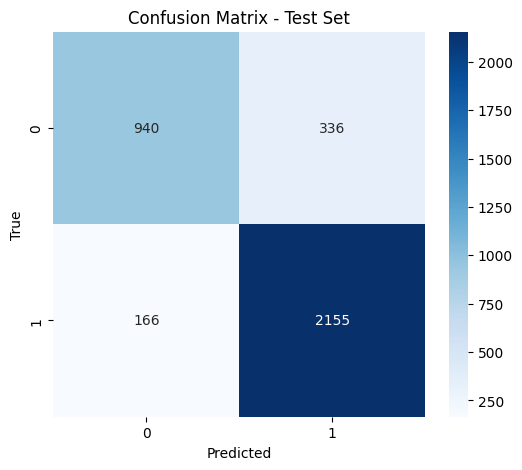

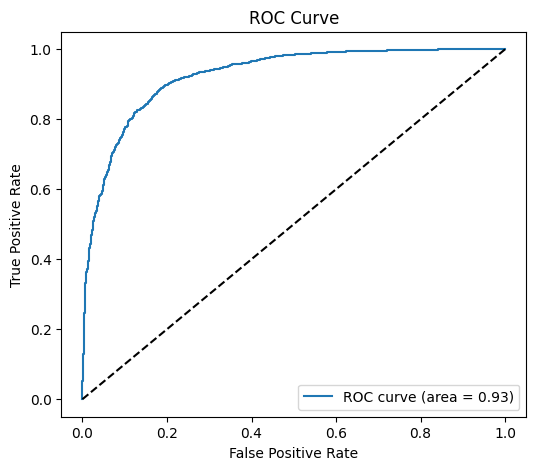

In [15]:
# !pip install catboost # Install catboost library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
combined_df = pd.read_csv("/content/drive/MyDrive/ML_combined_protein_features.csv")

if 'UniProt_ID' in combined_df.columns:
    combined_df = combined_df.drop(columns=['UniProt_ID'])

X = combined_df.drop("Label", axis=1)
y = combined_df["Label"]

# Train/Validation/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")

# Define models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
cat = CatBoostClassifier(verbose=0, random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Hyperparameter grids
param_grids = {
    'rf': {'n_estimators': [100, 200]},
    'xgb': {'n_estimators': [100, 200]},
    'cat': {'iterations': [100, 200]},
    'lgbm': {'n_estimators': [100, 200]}
}

# Grid search
models = {'rf': rf, 'xgb': xgb, 'cat': cat, 'lgbm': lgbm}
best_models = {}

for name, model in models.items():
    print(f"🔍 Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"✅ Best {name} params: {grid.best_params_}")

# Voting Classifier
ensemble = VotingClassifier(
    estimators=[('rf', best_models['rf']), ('xgb', best_models['xgb']), ('cat', best_models['cat']), ('lgbm', best_models['lgbm'])],
    voting='soft'
)
ensemble.fit(X_train, y_train)

# Validation performance
y_val_pred = ensemble.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"\n🎯 Validation Accuracy: {val_acc:.4f}")
print(classification_report(y_val, y_val_pred))

# Final Test performance
y_test_pred = ensemble.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
y_test_proba = ensemble.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [16]:
## Bayesian Optimization - Fine Tuning
# 1. Install
!pip install scikit-optimize --quiet

# 2. Imports
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# 3. Search spaces
search_spaces = {
    'rf': {
        'n_estimators': (100, 1000),
        'max_depth': (3, 30),
        'min_samples_split': (2, 20)
    },
    'xgb': {
        'n_estimators': (100, 1000),
        'max_depth': (3, 30),
        'learning_rate': (0.01, 0.3, 'log-uniform')
    },
    'lgbm': {
        'n_estimators': (100, 1000),
        'max_depth': (3, 30),
        'learning_rate': (0.01, 0.3, 'log-uniform')
    },
    'cat': {
        'iterations': (100, 1000),
        'depth': (3, 10),
        'learning_rate': (0.01, 0.3, 'log-uniform')
    }
}

# 4. Models
models = {
    'rf': RandomForestClassifier(random_state=42),
    'xgb': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'lgbm': LGBMClassifier(random_state=42),
    'cat': CatBoostClassifier(verbose=0, random_state=42)
}

# 5. Tuning
best_models_bayes = {}

for name, model in models.items():
    print(f"Bayesian tuning {name}...")

    opt = BayesSearchCV(
        model,
        search_spaces[name],
        n_iter=30,  # Number of parameter settings sampled
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    opt.fit(X_train, y_train)
    best_models_bayes[name] = opt.best_estimator_

    print(f"Best {name} params: {opt.best_params_}\n")

# 6. Build new ensemble
ensemble_bayes = VotingClassifier(
    estimators=[('rf', best_models_bayes['rf']), ('xgb', best_models_bayes['xgb']), ('cat', best_models_bayes['cat']), ('lgbm', best_models_bayes['lgbm'])],
    voting='soft'
)
ensemble_bayes.fit(X_train, y_train)

# 7. Evaluate again
y_val_pred = ensemble_bayes.predict(X_val)
y_test_pred = ensemble_bayes.predict(X_test)

print(f"\nNew Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"\nNew Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00
🔍 Bayesian tuning rf...
✅ Best rf params: OrderedDict([('max_depth', 27), ('min_samples_split', 2), ('n_estimators', 124)])

🔍 Bayesian tuning xgb...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best xgb params: OrderedDict([('learning_rate', 0.045401641878176635), ('max_depth', 28), ('n_estimators', 194)])

🔍 Bayesian tuning lgbm...
[LightGBM] [Info] Number of positive: 10830, number of negative: 5953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 16783, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.645296 -> initscore=0.598425
[LightGBM] [Info] Start training from score 0.598425
✅ Best lgbm params: OrderedDict([('learning_rate', 0.15171809566296443), ('max_depth', 15), ('n_estimators', 574)])

🔍 Bayesian tuning cat...
✅ Best cat params: OrderedDict([('depth', 10), ('iterations', 374), ('learning_rate', 0.1591428477544593)])



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:01:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 10830, number of negative: 5953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 16783, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.645296 -> initscore=0.598425
[LightGBM] [Info] Start training from score 0.598425

🎯 New Validation Accuracy: 0.8776

🎯 New Test Accuracy: 0.8710


In [ ]:

# Train/Validation/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")

# Define and use fine-tuned models from Bayesian Optimization
rf = RandomForestClassifier(max_depth=27, min_samples_split=2, n_estimators=124, random_state=42)
xgb = XGBClassifier(learning_rate=0.0454, max_depth=28, n_estimators=194, random_state=42, use_label_encoder=False, eval_metric='logloss')
cat = CatBoostClassifier(depth=10, iterations=374, learning_rate=0.1591, verbose=0, random_state=42)
lgbm = LGBMClassifier(learning_rate=0.1517, max_depth=15, n_estimators=574, random_state=42)

# Voting Classifier
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('cat', cat), ('lgbm', lgbm)],
    voting='soft'
)
ensemble.fit(X_train, y_train)

# Save final model
joblib.dump(ensemble, '/content/drive/MyDrive/ML_final_ensemble_model.pkl')
print("✅ Final model saved to /content/drive/MyDrive/ML_final_ensemble_model.pkl")

# Validation performance
y_val_pred = ensemble.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"\n🎯 Validation Accuracy: {val_acc:.4f}")
print(classification_report(y_val, y_val_pred))

# Final Test performance
y_test_pred = ensemble.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
y_test_proba = ensemble.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
